# Data Mining Versuch Recommender Systeme

* Autor: Prof. Dr. Johannes Maucher
* Datum: 30.09.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)


# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* __Ähnlichkeit:__ Verfahren zur Bestimmung der Ähnlichkeit zwischen Personen (Kunden) und Elementen (Produkten)
* __Empfehlungssysteme__ Collaborative Filtering 
* __Collaborative Filtering:__ Nutzerbezogener Ansatz und elementbasierter Ansatz

Sämtliche Verfahren und Algorithmen werden in Python implementiert.

## Theorie zur Vorbereitung
### Recommender Systeme
Recommender Systeme werden im E-Commerce eingesetzt um Werbung in Form von kundenspezifischen Empfehlungen zu verteilen. Weitläufig bekannt sind die Amazon-Empfehlungen, die entweder per e-mail geschickt oder nach dem Log-In in der Web-Page angezeigt werden. Diese Empfehlungen werden in Abhängigkeit von den bisher vom jeweiligen Kunden gekauften bzw. bewerteten Produkten erstellt. In diesem Versuch werden die derzeit wohl am weitest verbreiteteten Verfahren für die Erzeugung kundenspezifischer Empfehlungen vorgestellt, darunter das elementweise Collaborative Filtering, welches z.B. auch von Amazon eingesetzt wird.     

Direkt-Marketing Methoden wie die kundenspezifische Erzeugung und Bereitstellung von Werbung erfordern detaillierte Kunden- und Warenkorbanalysen. Kunden mit ähnlichem Kaufverhalten werden in Kundengruppen zusammengefasst. Die Warenkorbanalyse untersucht u.a. welche Waren bevorzugt im Verbund von der gleichen Person gekauft werden. Damit kann ein Händler Werbung in Form von Empfehlungen individuell und gezielt an seine Kunden richten, abhängig davon welcher Kundengruppe er angehört und welche Produkte bevorzugt von dieser Kundengruppe nachgefragt werden. 

Im ersten Teil der Übung werden fiktive Daten in einer überschaubaren Menge verwendet. Es handelt sich hier um Filmbewertungen. Anhand dieses Beispiels sollen die notwendigen Methoden und Abläufe implementiert und getestet werden. Diese werden im zweiten Teil der Übung auf echte Daten angewandt. Hierzu werden über eine Python-API Daten vom Internet-Meta-Radio _last.fm_ integriert. Auf der Basis dieser Daten sollen dann Musikempfehlungen für last.fm User berechnet werden. 

Recommender Systeme lassen sich mit

* Clustering Verfahren
* Suchalgorithmen
* Collaborativen Filtering 
 
realisieren. Am häufigsten wird hierbei das Collaborative Filtering eingesetzt. Für das Collaborative Filtering wird jeder der $M$ User durch einen $N$-dimensionalen Vektor beschrieben, wobei $N$ die Anzahl der Produkte im Angebot des Händlers ist. Jedes Element im Vektor gehört zu einem speziellen Produkt. Das Element hat den Wert 1, wenn der User dieses Produkt bereits gekauft hat, sonst 0 (andere Wertbelegungen sind möglich, z.B. wenn Produktbewertungen vorliegen). Alle $M$ Zeilenvektoren können zur _User/Item_ Matrix zusammengefasst werden (siehe Abbildung).

![Abbildung User Item Matrix](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/UserItemMatrix.png "User Item Matrix")

Das traditionelle __userbasierte Collaborative Filtering (UCF)__, benutzt die Ähnlichkeit zwischen Benutzern: Um für User $U_i$ eine Empfehlung zu erzeugen wird zunächst der diesem User ähnlichste Kunde (oder eine Menge vom ähnlichsten Kunden) ermittelt. Dann werden $U_i$ die Produkte (Items) empfohlen, welche der ähnlichste Kunde gekauft hat, $U_i$ selbst jedoch noch nicht. 

Dieser Ansatz skaliert schlecht im Fall sehr großer _User/Item_-Matrizen. Ausserdem ist er für User, welche erst wenige Produkte gekauft haben unzuverlässig. Besser eignet sich in diesen Fällen das __itembasierte Collaborative Filtering (ICF)__. Es wird u.a. von Amazon.com eingesetzt. Diese Variante benutzt die Ähnlichkeit zwischen Produkten (Items). Dabei sind Produkte umso ähnlicher je mehr Kunden diese Produkte gemeinsam gekauft haben. Für die Produkte welche ein Referenzuser $U_i$ bereits gekauft hat, werden die ähnlichsten Produkte ermittelt. Diese ähnlichsten Produkte werden $U_i$ empfohlen, wenn er sie nicht schon selbst gekauft hat.

Im folgenden Abschnitt werden einige gebräuchliche Metriken für die Berechnung der Ähnlichkeit zwischen Benutzern oder Artikeln vorgestellt. Für Collaboratives Filtering wird sehr häufig das Cosinus - Ähnlichkeitsmaß eingesetzt.


### Gebräuchliche Ähnlichkeitsmaße

Die __euklidische Distanz__ $d_E(\underline{a},\underline{b})$ zwischen zwei n-dimensionalen Vektoren $\underline{a}=(a_1,\ldots,a_n)$ und $\underline{b}=(b_1,\ldots,b_n)$ berechnet sich zu
	$$
	d_E(\underline{a},\underline{b})=\sqrt{\sum_{i=1}^n (a_i-b_i)^2}
	$$
Zwei Vektoren können als umso ähnlicher erachtet werden, je kleiner deren euklidische Distanz ist. 
Ein auf der euklidischen Metrik basierendes Ähnlichkeitsmaß zwischen zwei Vektoren $\underline{a}$ und $\underline{b}$ kann durch 
$$
s_E(\underline{a},\underline{b})=\frac{1}{1+d_E(\underline{a},\underline{b})}
$$
angegeben werden.


__Pearson Korrelation__
Die Ähnlichkeit zwischen zwei Vektoren kann auch durch den Pearson-Korrelationskoeffizient $\rho_{\underline{a},\underline{b}}$ ausgedrückt werden. Er berechnet sich zu
$$
\rho_{\underline{a},\underline{b}}= \frac{1}{N}\cdot \sum\limits_{i=1}^{N}\frac{(a_i-\overline{a})}{\sigma_a} \frac{(b_i-\overline{b})}{\sigma_b}
$$
Dabei bezeichnet $N$ die Länge der Vektoren, $\overline{a}$ den Mittelwert und $\sigma_a$ die Standardabweichung des Vektors $\underline{a}$. 

Der Pearson-Korrelationskoeffizient misst die lineare Abhängigkeit zwischen zwei Vektoren. Der maximale Wert von $+1$ wird erreicht, wenn die durch die beiden Vektoren definierten N Punkte im 2-dimensionalen Raum auf einer ansteigenden Geraden liegen. Der Minimalwert von $-1$ wird erreicht, wenn die Punkte auf einer abfallenden Geraden liegen. Der Betrag des Koeffizienten ist umso kleiner, je stärker die Punkte von einer fiktiven Geraden (kann durch lineare Regression berechnet werden) abweichen. Der Koeffizient ist $0$ wenn keine lineare Abhängigkeit zwischen den Vektoren besteht.


__Cosinus Ähnlichkeitsmaß__
Die Ähnlichkeit zwischen zwei Vektoren kann auch durch den Cosinus $\cos(\underline{a},\underline{b})$ ausgedrückt werden. Er berechnet sich zu
$$
\cos(\underline{a},\underline{b})= \frac{\underline{a} \cdot \underline{b}}{\left\|\underline{a}\right\|\cdot \left\|\underline{b}\right\|}
$$
wobei im Zähler das Skalarprodukt der beiden Vektoren steht und mit $\left\|\underline{x}\right\|$ der Betrag des Vektors $\underline{x}$ bezeichnet wird.

Falls die Vektoren $\underline{a}$ und $\underline{b}$ mittelwertfrei sind, ist der Cosinus-Ähnlichkeitswert gleich dem Pearson-Korrelationswert. In der Dokument- und Textanalyse wird vornehmlich das Cosinus-Ähnlichkeitsmaß verwendet. 


__Russel Rao Ähnlichkeitsmaß__
Die Russel Rao-Ähnlichkeit zwischen zwei binären Vektoren $\underline{a}$ und $\underline{b}$ mißt das Verhältnis zwischen der Anzahl $\alpha$ der Stellen in denen beide Vektoren den Wert 1 haben und der Länge $n$ der Vektoren. Z.B. ist für die Vektoren $\underline{a}=(1,0,1,0,0,1)$ und $\underline{b}=(0,1,1,1,0,1)$ die Russel-Rao-Ähnlichkeit $s_{RR}(\underline{a},\underline{b})=2/6=0.333$.

__Jaccard Ähnlichkeitsmaß__
Die Jaccard-Ähnlichkeit zwischen zwei binären Vektoren $\underline{a}$ und $\underline{b}$ mißt das Verhältnis zwischen der Anzahl $\alpha$ der Stellen in denen beide Vektoren den Wert $1$ haben und der Anzahl der Stellen in denen mindestens einer der beiden Vektoren ungleich $1$ ist. Z.B. ist für die Vektoren $\underline{a}=(1,0,1,0,0,1)$ und $\underline{b}=(0,1,1,1,0,1)$ die Jaccard-Ähnlichkeit $s_{J}(\underline{a},\underline{b})=2/5=0.5$. %Die Jaccard Metrik wird in diesem Versuch für die Bestimmung der Ähnlichkeit von _last.fm_-Usern eingesetzt.


## Vor dem Versuch zu klärende Fragen
Eine Untermenge der im Folgenden aufgeführten Fragen wird zu Beginn des Versuchs im Rahmen eines Gruppenkolloqs abgefragt. Auf jede Frage sollte von mindestens einem Gruppenmitglied eine Antwort geliefert werden und jedes Gruppenmitglied muss mindestens eine der gestellten Fragen beantworten können.

**Aufgaben:**

* Beschreiben Sie das Prinzip des userbasierten Collaborativen Filtering (UCF).

#### Antwort

UFC nutzt Änlichkeiten zwischen Nutzern um ihnen Produkte vorzuschlagen. Einem Nutzer werden die von einem ähnlichen Nutzer gekauften Produkte vorgeschlagen.

Es werden Kaufverhalten von Benutzergruppen beobachtet, um auf die interessen Einzelner zu schließen.
1. Schritt: Suche nach einer Nutzergruppe die ein ähnliches Kaufverhalten wie der aktive Nutzer vorweist. 
2. Schritt: Verwende die Kaufentscheidungen der Gruppe um Vorhersagungen für den aktiven Nutzer zu treffen. 

* Welche Nachteile hat das UCF?

#### Antwort

Bei Nutzern die erst wenig gekauft haben sind die Vorschläge nicht präzise. Außerdem skaliert es schlecht da sehr große Matrize über alle Nutzer und Produkte erstellt werden muss (User/Item Matrizen).

* Worin besteht der Unterschied zwischen UCF und itembasierten Collaborativen Filtering (ICF)?

#### Antwort

Es wird der Betrachrungswinkel geändert.
Anders als UFC wird bei IFC die Ähnlichkeit zwischen Produkten genutzt und nicht Ähnlichkeit zwischen Nutzern. Anhand eines Produktes werden ähnlich Produkte vorgeschlagen, ohne dass Nutzer verglichen werden müssen.
Die Ähnlichkeit zwischen Produkten werden gemessen, an der häufigkeit der Käufe, die für die Produkte gemeinsam getätigt wurden.

##### UFC
Bei einem UCF werden Userprofile erzeugt und der jenige der dem aktiven User am ähnlichsten ist zugeschrieben.
Das heißt, es werden die Produkte vorgeschlagen, die ein anderer User gekauft hat, man selbst aber nicht.

##### ICF
ICF fokussiert sich auf Produkte.
Es existieren 500 potenzielle Käufer auf der Plattform.
300 davon kaufen ein IPhone und davon kaufen 290 User zusätzlich eine Hülle. Dann ergibt das für Produkt IPhone und
Produkt Hülle eine Ähnlichkeit die den Produkten zugeschrieben werden. Einem neuen User, der ein IPhone kauft werden nun ähnliche Produkte z. B. die Hülle vorgeschlagen.

* Gegeben seien die Vektoren 

    \begin{eqnarray*}
    \underline{a} & = & [1,2,3,4,5,6] \\
    \underline{b} & = & [3,3,5,6,7,8] \\
    \end{eqnarray*}
    
    Schreiben Sie eine Python Funktion, die den Mittelwert derartiger Vektoren berechnet. Schreiben Sie eine weitere Funktion, die die Varianz berechnet

In [13]:
import math
import numpy as np
vA= [1,2,3,4,5,6]
vB= [3,3,5,6,7,8]

def avg(vector):
    return sum(vector) / float(len(vector))

def var(vector):
    return sum([(val - avg(vector))**2 for val in vector]) / len(vector)

print 'average  A:',avg(vA),'            numpy:', np.mean(vA)
print 'average  B:',avg(vB),'  numpy:', np.mean(vB)
print 'variance A:',var(vA),'  numpy:', np.var(vA)
print 'variance B:',var(vB),'  numpy:', np.var(vB)

average  A: 3.5             numpy: 3.5
average  B: 5.33333333333   numpy: 5.33333333333
variance A: 2.91666666667   numpy: 2.91666666667
variance B: 3.55555555556   numpy: 3.55555555556


* Wie groß ist die

    - Euklidische Ähnlichkeit
    - Pearson Ähnlichkeit
    - Cosinus Ähnlichkeit
    
    zwischen den Vektoren $\underline{a}$ und $\underline{b}$? 

In [14]:
def euclideanDist(vA,vB):
    if (len(vA) != len(vB)): raise ValueError("Vectors are not the same size")
    return math.sqrt(sum([(a-b)**2 for a,b in zip(vA,vB)]))

def pearsonCorr(vA,vB):
    '''
    Erklärung: http://www.crashkurs-statistik.de/der-korrelationskoeffizient-nach-pearson/
    '''
    if (len(vA) != len(vB)): raise ValueError("Vectors are not the same size")
        
    avgA = avg(vA)
    avgB = avg(vB)
        
    x = [a-(avg(vA)) for a in vA]
    y = [b-(avg(vB)) for b in vB]
        
    z = sum([a*b for a,b in zip(x,y)])
        
    v = math.sqrt(sum([(a-avgA)**2 for a in vA]))
    w = math.sqrt(sum([(b-avgB)**2 for b in vB]))

    return z/(v*w)

import scipy.stats as stats
import scipy.spatial.distance as dc

def cosine(vA, vB):
    return 1 - dc.cosine(vA,vB)

# eucliddis
print 'Euklidische Distanz:', euclideanDist(vA,vB), '    scipy:', dc.euclidean(vA,vB)
#print np.linalg.norm(a)
# pearson 
print '\nPearson Ähnlichkeit:', pearsonCorr(vA,vB), '   scipy:', stats.pearsonr(vA,vB)
#print '\n\n', np.corrcoef(vA,vB)
# cosine
print "\nCosinus Ähnlichkeit:", cosine(vA,vB)

Euklidische Distanz: 4.58257569496     scipy: 4.58257569496

Pearson Ähnlichkeit: 0.983343422063    scipy: (0.98334342206285474, 0.0004138517691427288)

Cosinus Ähnlichkeit: 0.991060084745


* In welchen Fällen sind Cosinus- und Pearsonähnlichkeit der euklidischen Ähnlichkeit vorzuziehen?

##### Antwort
Die euklidische Distanz besitz die Eigenschaft, dass Sie nur Auskunft über die absolute Ähnlichkeit treffen kann.
Desto kleiner der Abstand desto ähnlicher die Daten.

In fällen in denen wir nur wissen wollen ob sich Werte gleich verändern, sollte Cosinus oder Pearson genutz werden.
Sie haben die eigenschaft nicht von skalierung oder linearer verschiebung der Daten beeinflusst zu werden.

In [15]:
from IPython.display import Latex
from IPython.display import Image
import pylast

# Versuchsdurchführung
## Teil 1: Fiktive Filmbewertung
### Daten
Folgende Tabelle enthält die Filmbewertungen von 7 Personen.
from IPython.display import Latex
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

![Abbildung Bewertung Fiktive Kunden](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining/Bilder/recommenderFilmRecommendations.PNG)

Die Tabelle ist als Python dictionary _critics_ implementiert. Die Keys des Python-Dictionary definieren die Namen von Personen (Zeilen in der Matrix), die Filme bewertet haben. Die Values sind selbst wieder Dictionarys, welche als Keys die Filmnamen (Spalten in der Matrix) und als Values die jeweilige Filmbewertung (Matrixelment) enthalten.

In [16]:
critics={
    'Lisa Rose': 
        {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
    'Gene Seymour': 
        {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5},
    'Michael Phillips': 
        {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
    'Claudia Puig': 
        {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
    'Mick LaSalle': 
        {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
    'Jack Matthews': 
        {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
    'Toby': 
        {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}
}

### Ähnlichkeiten berechnen

Für die Bestimmung der Ähnlichkeit zwischen Personen und Produkten werden in diesem Versuch ein auf der euklidischen Distanz basierendes Ähnlichkeitsmaß und die Pearson-Korrelation verwendet. Beide Ähnlichkeitsmaße sind in den unten definierten Funktionen implementiert. Alle drei hier implementierten Funktionen zur Berechnung der Ähnlichkeit erhalten als Übergabeparameter das oben definierte Dictionary, das die Filmbewertungen enthält und die Namen der zwei Personen, die verglichen werden sollen. 

Zu beachten ist, dass in beiden Funktionen für die Berechnung der Ähnlichkeit zwischen zwei Personen nur die Produkte berücksichtigt werden, welche von beiden Personen schon bewertet wurden. Es handelt sich hier also um modifizierte Ähnlichkeitsfunktionen. 

__Aufgabe:__
Fragen Sie von diesem Dictionary _Toby's_ Bewertung des Films _Snakes on a Plane_ ab und geben Sie diesen Wert aus: 

In [17]:
#Your Code
print "Toby's critic:",critics['Toby']['Snakes on a Plane']

Toby's critic: 4.5


In [18]:
import numpy as np
import scipy.spatial.distance as sci


def sim_euclid(prefs,person1,person2,normed=True):
  ''' Returns a euclidean-distance-based similarity score for 
  person1 and person2. In the distance calculation the sum is computed 
  only over those items, which are nonzero for both instances, i.e. only
  films which are ranked by both persons are regarded.
  If the parameter normed is True, then the euclidean distance is divided by
  the number of non-zero elements integrated in the distance calculation. Thus
  the effect of larger distances in the case of an increasing number of commonly ranked
  items is avoided.
  '''
  # Get the list of shared_items
  si={}
  for item in prefs[person1]: 
    if item in prefs[person2]: si[item]=1
  # len(si) counts the number of common ratings
  # if they have no ratings in common, return 0
  if len(si)==0: return 0

  # Add up the squares of all the differences
  sum_of_squares=np.sqrt(sum([pow(prefs[person1][item]-prefs[person2][item],2) 
                     for item in prefs[person1] if item in prefs[person2]]))
  if normed:
     sum_of_squares= 1.0/len(si)*sum_of_squares
  return 1/(1+sum_of_squares)


def sim_pearson(prefs,p1,p2):
  '''
  Returns the Pearson correlation coefficient for p1 and p2
  '''
    
  # Get the list of commonly rated items
  si={}
  for item in prefs[p1]: 
    if item in prefs[p2]: si[item]=1

  # if they are no ratings in common, return 0
  if len(si)==0: return 0

  # Sum calculations
  n=len(si)
  
  # Calculate means of person 1 and 2
  mp1=np.mean([prefs[p1][it] for it in si])
  mp2=np.mean([prefs[p2][it] for it in si])
  
  # Calculate standard deviation of person 1 and 2
  sp1=np.std([prefs[p1][it] for it in si])
  sp2=np.std([prefs[p2][it] for it in si])
  
  # If all elements in one sample are identical, the standard deviation is 0. 
  # In this case there is no linear correlation between the samples
  if sp1==0 or sp2==0:
      return 0
  r=1/(n*sp1*sp2)*sum([(prefs[p1][it]-mp1)*(prefs[p2][it]-mp2) for it in si])
  return r


def sim_RusselRao(prefs,person1,person2,normed=True):
  ''' Returns RusselRao similaritiy between 2 users. The RusselRao similarity just counts the number
  of common non-zero components of the two vectors and divides this number by N, where N is the length
  of the vectors. If normed=False, the division by N is omitted.
  '''
  # Get the list of shared_items
  si={}
  commons=0
  for item in prefs[person1]: 
    if prefs[person1][item]==1 and prefs[person2][item]==1:   
        commons+=1
  #print commons
  if not normed:
      return commons
  else:
      return commons*1.0/len(prefs[person1]) 

**Aufgabe:**
1. Geben Sie die euklidische Ähnlichkeit und die Pearson Ähnlichkeit zwischen den Personen _Toby_ und _Lisa Rose_ aus.
2. Diskutieren Sie die unterschiedlichen Ähnlichkeitswert
3. Welches Ähnlichkeitsmaß erscheint Ihnen für diese Anwendung am besten geeignet?

In [164]:
#1
print '### 1 ###'
print "Euklidische Distanz (Toby,Lisa):", sim_euclid(critics, 'Toby', 'Lisa Rose')
print "Pearson Distanz (Toby,Lisa):", sim_pearson(critics, 'Toby', 'Lisa Rose')
print '\n'


#2,3
print '### 2,3 ###'
'''
Die Euklidische Distanz macht hier wenig Sinn,
da sie nur den Absoluten Wert der Unterschiede der Attribute betrachtet.
Dies lässt sich am folgenden beispiel beobachten.

Gegeben sind die Werte: [1,2,1],[2,1,2],[2,3,2]
'''
dic1 = { '1':1, '2':2, '3':1} # graph: /\
dic2 = { '1':2, '2':1, '3':2} # graph: \/
dic3 = { '1':2, '2':3, '3':2} # graph: /\+1
dic4 = { '1':4, '2':6, '3':4} # graph: (/\+1)*2

dic = {'dic1':dic1, 'dic2':dic2, 'dic3':dic3, 'dic4':dic4}

#daraus ergeben sich folgende Ähnlichkeiten

print 'sim_euclid:'
print '   /\\ <-> \\/       :', sim_euclid(dic, 'dic1', 'dic2') # 0.633974596216
print '   /\\ <-> /\\+1     :', sim_euclid(dic, 'dic1', 'dic3') # 0.633974596216
print ''
print 'sim_pearson' 
print '   /\\ <-> \\/       :', sim_pearson(dic, 'dic1', 'dic2') # -1.0
print '   /\\ <-> /\\+1     :', sim_pearson(dic, 'dic1', 'dic3') # 1.0
print '   /\\ <-> (/\\+1)*2 :', sim_pearson(dic, 'dic1', 'dic4') # 1.0

'''
Somit gibt sich trotz der verschiedenen Formen der Kurven beim euklidischen Abstand der exakt gleiche Wert, 
da die Summe der Abstände gleich ist.

Im gegensatz dazu liefert Pearson 1 und -1, wobei 1 eine absolute Ähnlichkeit darstellt 
und -1 keine Ähnlichkeit darstellt.
Pearson ignoriert somit Skalierung und lineare Verschiebung der Daten.
'''

### 1 ###
Euklidische Distanz (Toby,Lisa): 0.615911621789
Pearson Distanz (Toby,Lisa): 0.991240707162


### 2,3 ###
sim_euclid:
   /\ <-> \/       : 0.633974596216
   /\ <-> /\+1     : 0.633974596216

sim_pearson
   /\ <-> \/       : -1.0
   /\ <-> /\+1     : 1.0
   /\ <-> (/\+1)*2 : 1.0


'\nSomit gibt sich trotz der verschiedenen Formen der Kurven beim euklidischen Abstand der exakt gleiche Wert, \nda die Summe der Abst\xc3\xa4nde gleich ist.\n\nIm gegensatz dazu liefert Pearson 1 und -1, wobei 1 eine absolute \xc3\x84hnlichkeit darstellt \nund -1 keine \xc3\x84hnlichkeit darstellt.\nPearson ignoriert somit Skalierung und lineare Verschiebung der Daten.\n'

__Aufgabe:__
0. Schreiben Sie eine Funktion _topMatches(prefs,person,similarity)_, welche für eine beliebige in _critics_ enthaltene Person die Ähnlichkeitswerte zu allen anderen Personen berechnet und in einer geordneten Liste zurück gibt. Der Funktion soll als Übergabeparameter auch die anzuwendende Ähnlichkeitsfunktion (_sim_euclid_ oder _sim_pearson_) übergeben werden können. Berechnen Sie mit dieser Funktion für jede Person die _top matches_, zunächst unter Verwendung der euklidischen- dann unter Verwendung der Pearson-Ähnlichkeit.
1. Geben Sie mit der implementierten Funktion die _top matches_ der Person Toby aus.
2. Vergleichen Sie die beiden Ähnlichkeitsmaße. Welches Ähnlichkeitsmaß erscheint Ihnen für diesen Anwendungsfall sinnvoller und warum?

In [155]:
import collections
import operator

import pprint
pp = pprint.PrettyPrinter(indent=1)

### 1 ###
print '### 1 ###\n'
def topMatches(prefs, person, function):
    mapOfSimilarities = {}
    for personName, items in prefs.items():
        if personName != person:
            mapOfSimilarities[personName] = function(prefs, person, personName)
    return collections.OrderedDict(sorted(mapOfSimilarities.items(), key=operator.itemgetter(1), reverse=True))

print 'topMatches euklidean:'
for k,v in critics.items():
    print '\n',k, '\n##################################'
    for k1,v1 in topMatches(critics, k, sim_euclid).items(): print '%-16s ' % k1 ,':', '%14s ' % v1,'\n', 
    
    
print '\ntopMatches pearson:'
for k,v in critics.items():
    print '\n',k, '\n##################################'
    for k1,v1 in topMatches(critics, k, sim_pearson).items(): print '%-16s ' % k1 ,':', '%14s ' % v1,'\n',

### 1 ###

topMatches euklidean:

Jack Matthews 
##################################
Gene Seymour      : 0.909090909091  
Lisa Rose         : 0.720825488681  
Mick LaSalle      : 0.666666666667  
Claudia Puig      : 0.653453793544  
Michael Phillips  : 0.653453793544  
Toby              : 0.522774424948  

Mick LaSalle 
##################################
Lisa Rose         : 0.809256430169  
Michael Phillips  : 0.716699605901  
Gene Seymour      : 0.697830520748  
Claudia Puig      : 0.696432229193  
Jack Matthews     : 0.666666666667  
Toby              : 0.666666666667  

Claudia Puig 
##################################
Michael Phillips  :  0.77599076226  
Lisa Rose         : 0.759746926648  
Mick LaSalle      : 0.696432229193  
Gene Seymour      : 0.662294660325  
Jack Matthews     : 0.653453793544  
Toby              : 0.624638797705  

Lisa Rose 
##################################
Mick LaSalle      : 0.809256430169  
Michael Phillips  : 0.781550104746  
Claudia Puig      : 0.7597469

In [137]:
### 2 ###
print '\n### 2 ###'
print 'topMatches euklidean Toby:\n', topMatches(critics, 'Toby', sim_euclid).items()
print 'topMatches pearson Toby:\n', topMatches(critics, 'Toby', sim_pearson).items()


### 2 ###
topMatches euklidean Toby:
[('Mick LaSalle', 0.66666666666666663), ('Claudia Puig', 0.62463879770504627), ('Lisa Rose', 0.615911621788925), ('Michael Phillips', 0.55848155988774706), ('Jack Matthews', 0.52277442494833892), ('Gene Seymour', 0.51087470692394266)]
topMatches pearson Toby:
[('Lisa Rose', 0.99124070716193025), ('Mick LaSalle', 0.92447345164190509), ('Claudia Puig', 0.89340514744156441), ('Jack Matthews', 0.66284898035987028), ('Gene Seymour', 0.38124642583151169), ('Michael Phillips', -1.0)]



### 3 ###
overlapping values:

Toby
     {'Snakes on a Plane': 4.5, 'Superman Returns': 4.0, 'You, Me and Dupree': 1.0}

topmatch euklid: Mick LaSalle 0.666666666667 
     {'Snakes on a Plane': 4.0, 'Superman Returns': 3.0, 'You, Me and Dupree': 2.0}

topmatch pearson: Lisa Rose 0.991240707162 
     {'Snakes on a Plane': 3.5, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5}


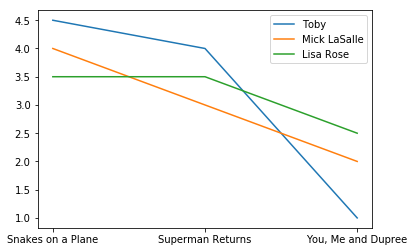

In [156]:
### 3 ###
print '\n### 3 ###'

'''
> Vergleichen Sie die beiden Ähnlichkeitsmaße. 
Welches Ähnlichkeitsmaß erscheint Ihnen für diesen Anwendungsfall sinnvoller und warum?

Die Frage, die wir uns hierfür stellen müssen ist, was für Ähnlichkeiten für die Applikation wichtig sind.

Die unterschiede der beiden Ähnlichkeitsfunktionen ist bereits in Aufgabe 1.3. erklärt.
Hier nochmal eine Zusammenfassung:

* Wenn der tatsächliche Unterschied der Werte der Attribute wichtig ist,
  dann nutzen wir die euklidische Ähnlichkeitsfunktion.

* Wenn wir allerdings einen Trend oder Formähnlichkeit (relative Ähnlichkeit) aller Werte suchen,
  nutzen wir die Pearson-Ähnlichkeitsfunktion.

Für unsere Anwendung nutzen wir die Pearson-Ähnlichkeitsfunktion.
In dem Fall der Filmempfehlung, ist der euklidische Abstand nicht nützlich,
da er nur den absoluten abstand der graphen betrachtet.
Wichtiger ist es hier relative Charakteristika zwischen den Werten für die Ähnlichkeit zu nutzen.

Im unten geplotteten Diagramm sieht man deutlich, dass Lisa Rose's Graph, Toby's Graph ähnlicher ist
als Mick LaSelle'S. Zwar ist der absolute Abstand zwischen Mick LaSelle und Toby kleiner 
aber bei Toby und Lisa ist der Graph von links nach rechts, erst flacher dann steiler abfalled.
'''

print 'overlapping values:'

toby = critics['Toby']
print '\nToby\n    ', toby

micksalle = {i:j for i,j in critics['Mick LaSalle'].items() if i in critics['Toby']}
print '\ntopmatch euklid: Mick LaSalle', topMatches(critics, 'Toby', sim_euclid).items()[0][1], '\n    ', micksalle

lisarose = {i:j for i,j in critics['Lisa Rose'].items() if i in critics['Toby']}
print '\ntopmatch pearson: Lisa Rose', topMatches(critics, 'Toby', sim_pearson).items()[0][1], '\n    ', lisarose

import matplotlib.pylab as plt

plt.plot(range(len(toby)), toby.values(), label='Toby')
plt.plot(range(len(micksalle)), micksalle.values(), label='Mick LaSalle')
plt.plot(range(len(lisarose)), lisarose.values(), label='Lisa Rose')
plt.legend()
plt.xticks(range(len(toby)), toby.keys())
plt.show()

__Aufgabe:__
Schreiben Sie eine Funktion _getRecommendations(prefs,person,similarity)_, mit der die Empfehlungswerte berechnet werden können und bestimmen Sie die Empfehlungswerte für Toby. Der Funktion wird  

* das Dictionary _critics_ mit den Filmbewertungen, 
* der Name der Person, für welche Empfehlungen berechnet werden sollen
* die Methode für die Berechnung der Ähnlichkeit _sim_euclid_ oder _sim_pearson_

übergeben. Die Methode soll eine geordnete Liste zurück geben. Jedes Listenelement enthält an erster Stelle den berechneten Empfehlungswert und an zweiter Stelle den Namen des Films. Die Liste soll nach Empfehlungswerten absteigend geordnet sein.

Testen Sie diese Funktion indem Sie die Empfehlungen für _Toby_ berechnen und mit den Werten in der oben aufgeführten Tabelle vergleichen.

In [145]:
def sum_for_item(prefs, person, item, similarity):
    korrelations = topMatches(prefs, person, similarity)
    item_sum = 0.0 
    for person_name, items in prefs.items():
        if person_name != person and korrelations[person_name]> 0:
            try:
                item_sum = item_sum + korrelations[person_name]*items[item]
            except KeyError:
                item_sum = item_sum
    return item_sum

def korrelation_sum(prefs, person, movie_name, similarity):
    korrelation_sum= 0.0
    korrelations = topMatches(prefs, person, similarity)
    for person_name, korrelation in korrelations.items():
        if person_name != person and korrelations[person_name]> 0 and has_evaluated_movie(prefs, person_name, movie_name):            
            korrelation_sum = korrelation_sum + korrelation            
    return korrelation_sum

def has_evaluated_movie(prefs, person, movie_name):
    for person_name, movies in prefs.items():
        if person == person_name and movie_name in movies:
            return True
    return False

def get_seen_movies(prefs, person):
    ''' Returns list of known movies of a User '''
    try: 
        return prefs[person].keys()
    except KeyError:
        return list()

def get_all_items(prefs):
    all_items = list()
    for person, items in prefs.items():
        all_items.extend(items.keys())
    return set(all_items)

def get_recommended(prefs, person, item, similarity):
    return round(sum_for_item(prefs, person, item, similarity) / korrelation_sum(prefs, person, item, similarity), 20)

def getRecommendations(prefs, person, similarity):
    recommendations = {}
    known_items = get_seen_movies(prefs, person)
    all_items = get_all_items(prefs)
    for movie_name in all_items:
        if movie_name not in known_items:
            recommendations[movie_name]=get_recommended(prefs, person, movie_name, similarity)
    return sorted(recommendations.items(), key=operator.itemgetter(1), reverse=True)   

In [146]:
print "Pearson: ", '\n', getRecommendations(critics, 'Toby', sim_pearson)

Pearson:  
[('The Night Listener', 3.3477895267131013), ('Lady in the Water', 2.8325499182641622), ('Just My Luck', 2.5309807037655645)]


###Berechnung von Empfehlungen mit User basiertem Collaborative Filtering
Für die Produkte, die von einer Person noch nicht gekauft wurden, sollen Empfehlungen berechnet werden. Die Empfehlungen können ebenfalls Werte zwischen 1 (wird nicht empfohlen) und 5 (wird stark empfohlen) annehmen. Für die Berechnung der Empfehlung werden die Bewertungen des jeweiligen Produkts durch die anderen Personen herangezogen. Dabei werden die Bewertungen der ähnlichen Personen (d.h. hoher Pearson-Korrelationswert) stärker mit einbezogen als die Bewertungen durch Personen mit einem niedrigen Korrelationswert.

__Beispiel:__
Toby hat die Filme _The Night Listener_, _Lady in the Water_ und _Just My Luck_ noch nicht gekauft. Für diese Filme soll für Toby eine Empfehlung berechnet werden.
In der unten aufgeführten Tabelle enthält die zweite Spalte die _Pearson-Ähnlichkeitswerte_ zwischen Toby und den anderen Personen. Die Spalten 3, 5 und 7 enthalten die Bewertungen der Filme _The Night Listener_, _Lady in the Water_ und _Just My Luck_ durch die anderen Personen. Die Spalten 4, 6 und 8 enthalten die jeweilige Filmbewertung gewichtet (mulipliziert) mit den Ähnlichkeitswerten der jeweiligen Person. Es fällt auf, dass in der Tabelle _Michael_ nicht enthalten ist. Das liegt daran, dass _Michael_ und _Toby_ einen negativen Ähnlichkeitswert aufweisen, d.h. deren Interessen sind gegenläufig. Personen mit negativem Ähnlichkeitswert sollten für Empfehlungen nicht berücksichtigt werden.
Die Zeile _Sum_ enthält die Summe aller gewichteten Bewertungen. Aus diesem Wert allein kann die Empfehlung noch nicht abgeleitet werden, da Filme die nur von wenigen Personen bewertet wurden, eine relativ kleine Summe ergeben. Deshalb sollte _Sum_ noch durch die Anzahl der Bewertungen für diesen Film geteilt werden. Oder besser: Nicht durch die Summe der Bewertungen, sondern durch die Summe der relevanten Ähnlichkeitswerte (_KSum_). Der resultierende Empfehlungswert ist in der letzten Zeile eingetragen.


![Abbildung Calculate Recommendation](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining/Bilder/recommenderFilmCalculation.PNG)


In [147]:
print "Pearson Toby: ", '\n', getRecommendations(critics, 'Toby', sim_pearson)
print ''
print "Euclid Toby: ", '\n', getRecommendations(critics, 'Toby', sim_euclid)

Pearson Toby:  
[('The Night Listener', 3.3477895267131013), ('Lady in the Water', 2.8325499182641622), ('Just My Luck', 2.5309807037655645)]

Euclid Toby:  
[('The Night Listener', 3.4273481378103883), ('Lady in the Water', 2.795737031164006), ('Just My Luck', 2.407392750287351)]


###Berechnung von Empfehlungen mit Item basiertem Collaborative Filtering
In den vorigen Aufgaben wurden Ähnlichkeiten zwischen Personen bestimmt und für Produktempfehlungen benutzt (User basiertes Collaborative Filtering). Jetzt soll die Ähnlichkeit zwischen Produkten berechnet werden und auf der Basis dieser Produktähnlichkeit Empfehlungen berechnet werden (Item basiertes Collaborative Filtering).

Dabei sollen die bereits implementierten Ähnlichkeitsfunktion _sim_euclid_ und _sim_pearson_ sowie die Ähnlichkeeits-Sortierfunktion _topMatches_ unverändert eingesetzt werden.

__Aufgabe:__

1. Implementieren Sie eine Funktion, welche das Bewertungsdictionary _critics_derart transformiert, dass die Funktionen _sim_euclid_, _sim_pearson_ und _topMatches_ für das Item basierte CF unverändert eingesetzt werden können. Die transformierte Matrix soll unter dem Namen _transCritics_ abgespeichert werden.
2. Schreiben Sie eine Funktion _calculateSimilarItems_, die aus der transformierten Matrix _transCritics_ ein Dictionary berechnet, welches die Ähnlichkeit zwischen allen Filmen beschreibt. Die Keys des Dictionary sind die Filmnamen. Die Values sind geordnete Listen, welche die Funktion _topMatches_ zurückgibt, wenn sie für die Filme (nicht für die User) aufgerufen wird. Dieses Dictionary wird an das aufrufende Programm zurück geben. 
3. Schreiben Sie eine Funktion _getRecommendedItems_, welche basierend auf dem im unten aufgeführten Beispiel dargestellten Verfahren unter Vorgabe der Bewertungsmatrix und der zu verwendenden Ähnlichkeitsfunktion Produktempfehlungen berechnet.
4. Testen Sie die Funktion indem Sie die Empfehlungen für Toby berechnen und mit den Werten in der unten aufgeführten Tabelle vergleichen

__Erläuterndes Beispiel:__

_Toby_ hat die Filme _The Night Listener_, _Lady in the Water_ und _Just My Luck_ noch nicht gekauft. Für diese Filme soll für _Toby_ eine Empfehlung berechnet werden. Gekauft und bewertet hat _Toby_ die Filme _Snakes on a plane_, _Superman Returns_ und _You and me and Dupree_. Diese bereits vorhandenen Filme bilden die erste Spalte der unten dargestellten Matrix. In der zweiten Spalte befinden sich _Toby's_ Bewertungen dieser Filme. Die Spalten 3,5 und 7 enthalten die Ähnlichkeitswerte (mit _calculateSimilarItems_ unter Verwendung des normierten euklidischen Ähnlichkeitsmaßes berechnet) zwischen den drei von _Toby_ noch nicht gekauften Filmen und den drei von _Toby_ bewerteten Filmen. Diese Ähnlichkeitswerte werden jeweils mit _Toby's_ Bewertungen multipliziert. Das Resultat dieser Multiplikation befindet sich in den Spalten 4,6 und 8. Der finale Empfehlungswert für die von _Toby_ noch nicht gekauften Filme wird berechnet in dem in den Spalten 4,6 und 8 zunächst die Summe über die Werte dieser Spalte in den drei oberen Zeilen berechnet wird und durch die Summe über die Werte der Spalten 3,5 und 7 geteilt wird. Im Fall, dass die _Pearson-Korrelation_ zwischen den Filmen als Ähnlichkeitswert herangezogen wird, können negative Ähnlichkeitswerte auftreten. Dann soll in die Berechnung eines Empfehlungswert für Film A nur dann die Bewertung von Film B einfließen, wenn der Korrelationswert zwischen beiden $>0$ ist.  

![Abbildung Calculate Itembased Recommendation](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining/Bilder/recommenderFilmItemBased.PNG)

In [158]:
#1
def get_all_person(crit):
    return crit.keys()

def get_trans_crit(crit):
    crit_by_movie = {}
    movies = get_all_items(crit)
    crit_by_movie = {}
    all_persons = crit.keys()
    for movie in movies:
        crit_by_movie[movie] = {}
        for person, movies in crit.items():
            try:
                crit_by_movie[movie][person] = movies[movie]
            except KeyError:
                pass
    return crit_by_movie

trans_critics = get_trans_crit(critics)
print "Aufgabe 1"
print trans_critics, '\n'

#2-------------------------------------------------------------------------------
def calculate_similar_items(prefs, film, similarity):
    return topMatches(get_trans_crit(prefs), film, similarity)

def get_similar_items_for_all_movies(prefs, similarity):
    all_movies= get_all_items(prefs)
    similar_movies = {}
    for movie in all_movies:
        similar_movies[movie]=calculate_similar_items(prefs, movie, similarity)
    return similar_movies
print "Aufgabe 2"
print get_similar_items_for_all_movies(critics, sim_euclid), '\n'

#3--------------------------------------------------------------------------------

def get_seen_movies_with_similarity(prefs, person, similarity):
    seen_movies= get_seen_movies(prefs, person)
    reduced_map = {}
    for movie in seen_movies:
        reduced_map[movie]=calculate_similar_items(prefs, movie, similarity)
    return reduced_map

def multily_with_rating(prefs, reduced_map, person):
    for film, ratings in reduced_map.items():
        factor = prefs[person][film]
        for movie, rating in ratings.items():
            ratings[movie] = rating * factor
    return reduced_map

def make_single_dict(reduced_multiplied_map):
    all_movies = set()
    for key, film_list in reduced_multiplied_map.items():
        for film, rating in film_list.items():
            all_movies.add(film)
    single_dict = {}        
    for film in all_movies:
        single_dict[film] = 0.0
    for key, film_list in reduced_multiplied_map.items():
        for film, rating in film_list.items():
            single_dict[film] = single_dict[film]+rating
    return single_dict

def divide_all_values(list_of_films, factor):
    for film, rating in list_of_films.items():
        list_of_films[film] = rating/factor
    return list_of_films

def normalise(single_dict, single_dict_multiplied):
    normalised_map = {}
    for film, rating in single_dict.items():
        normalised_map[film] = single_dict_multiplied[film] / single_dict[film]
    return normalised_map

def sort_out_seen_films(prefs, person, film_list):
    seen_movies = get_seen_movies(prefs, person)
    not_seen_films = {}
    for film, rating in film_list.items():
        if film not in seen_movies:
            not_seen_films[film] = film_list[film]
    return not_seen_films

def get_recommended_items(prefs, person, similarity):
    reduced_map = get_seen_movies_with_similarity(prefs, person, similarity)
    single_dict = sort_out_seen_films(prefs, person, make_single_dict(reduced_map))
    multiplied_ratings = multily_with_rating(prefs ,reduced_map, person)
    single_dict_multipied = sort_out_seen_films(prefs, person, make_single_dict(multiplied_ratings))
    count_of_seen_movies = len(get_seen_movies(prefs, person))
    result = single_dict_multipied
    return normalise(single_dict, single_dict_multipied)

#4---------------------------------------------------------------------
print "Aufgabe 4"
print get_recommended_items(critics, 'Toby', sim_euclid) 
print "Die Werte stimmen überein"

Aufgabe 1
{'Lady in the Water': {'Lisa Rose': 2.5, 'Jack Matthews': 3.0, 'Michael Phillips': 2.5, 'Gene Seymour': 3.0, 'Mick LaSalle': 3.0}, 'Snakes on a Plane': {'Jack Matthews': 4.0, 'Mick LaSalle': 4.0, 'Claudia Puig': 3.5, 'Lisa Rose': 3.5, 'Toby': 4.5, 'Gene Seymour': 3.5, 'Michael Phillips': 3.0}, 'Just My Luck': {'Claudia Puig': 3.0, 'Lisa Rose': 3.0, 'Gene Seymour': 1.5, 'Mick LaSalle': 2.0}, 'Superman Returns': {'Jack Matthews': 5.0, 'Mick LaSalle': 3.0, 'Claudia Puig': 4.0, 'Lisa Rose': 3.5, 'Toby': 4.0, 'Gene Seymour': 5.0, 'Michael Phillips': 3.5}, 'You, Me and Dupree': {'Jack Matthews': 3.5, 'Mick LaSalle': 2.0, 'Claudia Puig': 2.5, 'Lisa Rose': 2.5, 'Toby': 1.0, 'Gene Seymour': 3.5}, 'The Night Listener': {'Jack Matthews': 3.0, 'Mick LaSalle': 3.0, 'Claudia Puig': 4.5, 'Lisa Rose': 3.0, 'Gene Seymour': 3.0, 'Michael Phillips': 4.0}} 

Aufgabe 2
{'Lady in the Water': OrderedDict([('You, Me and Dupree', 0.76558762168507888), ('The Night Listener', 0.75974692664795784), ('Sn

##last.fm Musikempfehlungen
Kopieren Sie die Datei _pylast.py_ vom _Resources_-Ordner im _DataMining_-Ordner des Skripteservers in das Verzeichnis dieses _IPython Notebooks_. In dieser Datei sind alle Zugriffsfunktionen auf _last.fm_ Dienste implementiert. Die notwendigen Anmelde- und Authentifizierungsdaten für den User _pythonlab_ sind ebenfalls schon in diesem Modul eingetragen.

__Aufgabe:__

1. Stellen Sie durch Aufruf der Funktion _network=pylast.get_lastfm_network()_ eine Verbindung zu _last.fm_ her. Beim Aufruf der Funktion wird die Anmeldung und Authentifizierung durchgeführt. Die Funktion gibt ein Objekt der Klasse _Network_ zurück. Über dieses Objekt können Methoden, wie

    * ```get_artist("kuenstlerName")``` (liefert Objekt der Klasse _Artist_
    * ```get_album("albumName")``` (liefert Objekt der Klasse _Album_
    * ```get_track("songName")``` (liefert Objekt der Klasse _Track_
    * ```get_user("userName")``` (liefert Objekt der Klass_Tag_
    * usw.
    
      aufgerufen werden. Die Menge aller verfügbaren Klassen und deren Attribute und Methoden können dem Modul _pylast.py_ entnommen werden.

1. Rufen Sie über das oben instanziierte _Network_-Objekt die Methode _get_artist("BandIhrerWahl")_ auf.
2. Rufen Sie über das oben instanziierte _Artist_-Objekt die Methode ```topfans=get_top_fans(10)``` auf. Die Methode gibt eine Liste von _User_-Objekt/Gewichtung-Paaren zurück. Die Gewichtungen von Objekten werden in diesem Versuch nicht benötigt. Legen Sie deshalb mit _group=[a.item for a in topfan]_ eine Liste an, die nur noch die User Objekte enthält. **Wichtige Anmerkung:** Seit August 2015 gibt es Probleme mit der lastFM API Methode ```get_top_fans()``` (siehe auch: [pylast issues](https://github.com/pylast/pylast/issues/155s)). Falls am Versuchstermin der Fehler noch nicht behoben ist, können Sie den unten stehenden Code benutzen. Darin wird versucht auf die API-Methode zuzugreifen. Falls das nicht möglich ist, wird eine vordefinierte Liste von Usern angewandt. Diese Liste repräsentiert die _Top Fans_ der Band _Slipknot_ im Frühjahr 2015. 
3. Implementieren Sie eine Funktion _createLastfmUserDict()_. Dieser Funktion soll, die oben angelegte Liste von _User_-Objekten _group_ übergeben werden. Für jeden User in _group_ sollen die 20 beliebtesten Bands mit der Methode ```topartists=get_top_artists()[0:20]``` bestimmt werden. Die Methode gibt eine Liste von _Artist_-Objekt/Gewichtung-Paaren zurück. Die Gewichtungen von Objekten werden in diesem Versuch nicht benötigt. Auf das _i.te_ _Artist_-Objekt selbst kann mit ```topartists[i].item``` zugegriffen werden. Die Menge aller Bands, die auf diese Weise gesammelt werden, wird im folgenden mit _AllBands_ bezeichnet. D.h. in _AllBands_ befinden sich alle Bands, die für mindestens einen User in _group_ zu den Top-20 gehören. Nun soll ein verschachteltes Dictionary mit Namen _userDict_ wie folgt angelegt werden:

    * Die Keys sind die Namen der _User_-Objekte in _group_. Auf den Namen eines Objekts kann mit ```get_name()``` zugegriffen werden.
    * Die Values sind selbst wieder Dictionaries, deren Keys die Namen der Bands in _AllBands_ sind. Achten Sie auch hier darauf, dass Sie nicht das _Artist_-Objekt selbst, sondern dessen Namen als Key verwenden. 
    * Für den User _a_ und die Band _b_ ist der Value ```userDict[a][b]= 1```, falls _b_ zu den Top-20 des Users _a_ gehört. Andernfalls ist ```userDict[a][b]= 0```. 
    
    Das derart angelegte Dictionary soll von der Funktion zurückgegeben werden. 
4. Wählen Sie jetzt einen beliebigen User aus _group_. Bestimmen Sie zu diesem User die ähnlichsten User in _group_ durch Anwendung der im ersten Teilversuch implementierten Funktion _topMatches()_. Der Funktion wird das angelegte _userDict_ und der Name des gewählten Users übergeben. Als Ähnlichkeitsmaß soll die euklidische Metrik angewandt werden.
5. Bestimmen Sie dann für den gewählten User Band-Empfehlungen durch Anwendung der im ersten Teilversuch implementierten Funktion _getRecommendations()_. Der Funktion wird das angelegte _userDict_ und der Name des gewählten Users übergeben. Als Ähnlichkeitsmaß soll die euklidische Metrik, danach die Russel_Rao Metrik, angewandt werden.     
6. Diskutieren Sie das Ergebnis

In [174]:
import pylast
nw=pylast.get_lastfm_network(api_key = "993a5bd9d79a98a53677570368d55acd",
                             api_secret = "9b8de0b57903ac007cdd8ec9003b341e",
                             username = "pythonlab")

band='Slipknot'

art1 = nw.get_artist(band)

print "Most similar (as calculated by lastFM) for artist: ",band
for it in art1.get_similar(5):
    print "%3.3f \t %s"%(it.match, it.item)
try:
    topfan = art1.get_top_fans()
    group = [a.item for a in topfan]
except:
    print "\nlastFM API Error for method get_top_fans\nApply predefined group of users"
    usernames=['BrunoJoS','DPREBOYE','MPistol40','NemoNightfall','SkyRif','Wags1382','Znapsen','cortapsyco','emill_67','sattuviitana']
    group=[]
    for u in usernames:
        u1 = nw.get_user(u)
        group.append(u1)


Most similar (as calculated by lastFM) for artist:  Slipknot
1.000 	 Stone Sour
0.742 	 Korn
0.581 	 Mudvayne
0.485 	 System of a Down
0.459 	 Limp Bizkit

lastFM API Error for method get_top_fans
Apply predefined group of users


In [151]:
#4
'''
* Die Keys sind die Namen der User-Objekte in group. Auf den Namen eines Objekts kann mit get_name() 
zugegriffen werden.

* Die Values sind selbst wieder Dictionaries, deren Keys die Namen der Bands in AllBands sind. 
Achten Sie auch hier darauf, dass Sie nicht das Artist-Objekt selbst, sondern dessen Namen als Key verwenden.

* Für den User a und die Band b ist der Value userDict[a][b]= 1, falls b zu den Top-20 des Users a gehört. 
Andernfalls ist userDict[a][b]= 0.

#dict username: dict allbands : 0/1 
'''

def getAllArtists(users,countPerUser):
    alltopartists = [user.get_top_artists()[0:20] for user in users]
    # flatten list of all artists
    allArtists = list(set([user[0] for userbands in alltopartists for user in userbands]))
    return allArtists

allArtists = getAllArtists(group,20)
userNameslist = [user.get_name() for user in group]

def topArtistsToDict(allArtists,users_top_artists):
    usersTopArtistsList = [artist[0] for artist in users_top_artists]
    usersTopArtistsDict = {}
    for artist in allArtists:
        if artist in usersTopArtistsList:
            usersTopArtistsDict[artist.get_name().encode('utf-8')] = 1
        else:
            usersTopArtistsDict[artist.get_name().encode('utf-8')] = 0
    return usersTopArtistsDict
    
def createUserArtistDict(users, count):
    allArtists = getAllArtists(users,count)
    return {user.get_name(): topArtistsToDict(allArtists,user.get_top_artists()[0:20]) for user in users}

userArtistDict = createUserArtistDict(group,20)
print userArtistDict['DPREBOYE']

{'Team Sleep': 0, 'Flo Rida': 0, 'White Zombie': 0, 'Ke$ha': 0, 'Sabaton': 0, 'Tool': 0, 'Killswitch Engage': 0, 'Motion City Soundtrack': 0, 'Damien Rice': 1, 'Seether': 0, 'The Wonder Years': 0, 'Freestyle': 0, 'Dimmu Borgir': 0, 'Nirvana': 1, 'Trivium': 0, 'Green Day': 0, 'Electric Light Orchestra': 0, '\xe6\xa4\x8d\xe6\x9d\xbe\xe4\xbc\xb8\xe5\xa4\xab': 0, 'Breaking Benjamin': 0, 'Fall Out Boy': 0, 'Becoming the Archetype': 0, 'Three Days Grace': 0, 'Klamydia': 0, 'Queens of the Stone Age': 0, 'Iron Maiden': 0, 'Alexisonfire': 0, 'Rammstein': 0, 'Pendulum': 0, 'Pitty': 0, 'Black Label Society': 0, 'Lindemann': 0, 'Krewella': 0, 'Stam1na': 0, 'Gyllene Tider': 0, 'Radiohead': 0, 'Pentakill': 0, 'Bayside': 0, 'Nightwish': 0, 'Katy Perry': 0, 'Red Hot Chili Peppers': 0, 'Soilwork': 0, 'Magnus Uggla': 0, 'Shinedown': 0, 'Rage Against the Machine': 1, 'Oh, Sleeper': 0, 'Coheed and Cambria': 0, 'Halestorm': 0, 'A Perfect Circle': 0, 'Muse': 0, 'Soulfly': 0, '36 Crazyfists': 0, 'M.I.A.': 0,

In [152]:
#5
user = 'DPREBOYE'
print 'user:',user,'– euclidean similarity:\n'
for k,v in topMatches(userArtistDict, user, sim_euclid).items():
    print '  |','%-13s' % (k,),'->', v

user: DPREBOYE – euclidean similarity:

  | MPistol40     -> 0.961538461538
  | BrunoJoS      -> 0.961538461538
  | SkyRif        -> 0.961538461538
  | emill_67      -> 0.961538461538
  | cortapsyco    -> 0.960526128553
  | Wags1382      -> 0.960526128553
  | sattuviitana  -> 0.960526128553
  | Znapsen       -> 0.960526128553
  | NemoNightfall -> 0.960526128553


In [181]:
#6
def get_known_bands(prefs, person):
    ''' Returns list of known bands for a User '''
    try: 
        return {k:v for (k,v) in prefs[person].items() if v != 0}.keys()
    except KeyError:
        return list()

# wir müssen die getRecommendations funktion dazu erst verallgemeinern 
# da die getRecommendations funktion auf movies zugeschnitten ist 
    
def getRecommendationsX(prefs, known_items_function, person, similarity):
    recommendations = {}
    known_items = known_items_function(prefs, person, )
    all_items = get_all_items(prefs)
    for item in all_items:
        if item not in known_items:
            recommendations[item]=get_recommended(prefs, person, item, similarity)
    return sorted(recommendations.items(), key=operator.itemgetter(1), reverse=True)   

user = 'DPREBOYE'

euclidean_recom = getRecommendationsX(userArtistDict, get_known_bands, user, sim_euclid)
russelRao_recom = getRecommendationsX(userArtistDict, get_known_bands, user, sim_RusselRao)

print 'index', '%41s ' % 'euclidean similarity', '|' , '%-43s ' % 'russelRao similarity'
print '#############################################################################################'
for i,v in enumerate(zip(euclidean_recom,russelRao_recom)): 
    print '%3s ' % (i+1) , '%27s ' % (v[0][0],), '%-10s' % (v[0][1],),'|','%-14s' % (v[1][1],), '%-17s' % (v[1][0],)
    print '---------------------------------------------------------------------------------------------'

index                      euclidean similarity  | russelRao similarity                        
#############################################################################################
  1             System of a Down  0.666705683054 | 0.692307692308 System of a Down 
---------------------------------------------------------------------------------------------
  2                         Korn  0.555646593793 | 0.615384615385 Korn             
---------------------------------------------------------------------------------------------
  3      Five Finger Death Punch  0.444353406207 | 0.461538461538 Red Hot Chili Peppers
---------------------------------------------------------------------------------------------
  4        Red Hot Chili Peppers  0.333528415272 | 0.384615384615 Papa Roach       
---------------------------------------------------------------------------------------------
  5                   Papa Roach  0.333411366109 | 0.384615384615 Stone Sour       
----------

##### 7. Diskussion der Ergebnisse
Russel Rao und die euklidische Ähnlichkeit ergeben sehr ähnliche Vorschläge.

Der kleine Unterschied der Vorschläge zwischen euklid und russel rao lässt sich mit folgendem begründen.
Russell Rao nutzt Anzahl der Werte die für beide Vektoren 1 sind (1 und 1) und Teilt durch die Anzahl aller Werte.
Der euklidische Abstand betrachtet die abstände aller Werte was bei binären Daten dazu führt, 
dass nur unterschiedliche Werte ins gewicht fallen (0 und 1 , 1 und 0), 1-1 und 0-0 ändern nichts an der Ähnlichkeit.

Beispiel
X = 1,0,1,1,0  Y = 1,0,1,0,1 
Russel Rao = 2/5 
Euklid = sqrt((1-1)^2 + (0-0)^2 + (1-1)^2 + (1-0)^2 + (0-1)^2)) = sqrt((1-0)^2 + (0-1)^2))


Die Empfehlungen für beide Ähnlichkeitsfunktionen sind schlüssig. 
Es ergeben sich Vorschläge die man zu Slipknot erwarten würde.

Wenn man unsere Vorschläge mit den von lastFM vergleicht.
Sieht man dass die von lastFM berechneten, scheinbar skaliert werden, da der Top Match einen Wert von 1.0 hat.
Es werden wahrscheinlich mehr Userdaten für die empfehlungen benutzt.
Mudvayne z.B. ist gar nicht in unserem Datenset enthalten.

Die Top 5 (ausgenommen Mudvayne) sind bei uns in den Top 14 Vorschlägen enthalten.

getRecommendationsX()
  1   System of a Down  0.666705683054 | 0.692307692308 System of a Down 
  2               Korn  0.555646593793 | 0.615384615385 Korn             
  5         Papa Roach  0.333411366109 | 0.384615384615 Stone Sour       
  6         Stone Sour  0.333411366109 | 0.384615384615 Five Finger Death Punch
 14        Limp Bizkit  0.222235227685 | 0.230769230769 Limp Bizkit

lastFM
1.000 	 Stone Sour
0.742 	 Korn
0.581 	 Mudvayne
0.485 	 System of a Down
0.459 	 Limp Bizkit